In [1]:
import pandas as pd 
import numpy as np
import os
import sys

# Get the absolute path of the CropPrediction directory
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Append it to sys.path
sys.path.append(ROOT_DIR)

from analyze_src.basic_data_inspection import DataInspector,SummaryInspectionStrategy,DataTypesInspectionStrategy
from analyze_src.missing_value_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer,NumericalUnivariateAnalysis,CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer,NumericalVsNumericalAnalysis,CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultiVariateAnalysis
from src.runner import PreProcessing

In [2]:
# Load the data
# Assuming you have already extracted the data into 'extracted-data' folder

data_path = "D:\Projects\CropPredictionSystem\data\crop_recommendation.csv"
df = pd.read_csv(data_path)

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
process = PreProcessing()
label_mappings = process.run_encoding(df)

Encoding the label with technique LabelEncoding
Encoding of label feature completed the label mapping are {'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label_Encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [4]:
#Step 1: Basic Data Inspection
#-----------------------------
#Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.exceute_inspection(df)


Data Types and Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
df['label'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
#Switch the strategy to the summary statistics Inspection
# print(data_inspector)
data_inspector.set_strategy(SummaryInspectionStrategy())
data_inspector.exceute_inspection(df)


Summary Statistics (Numerical Features): 
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50

In [7]:
missing_values = SimpleMissingValuesAnalysis()
isThere_missingValues = missing_values.identify_missing_values(df)
if isThere_missingValues:
    missing_values.visualize_missing_values(df)

No Null values in the Dataset


N


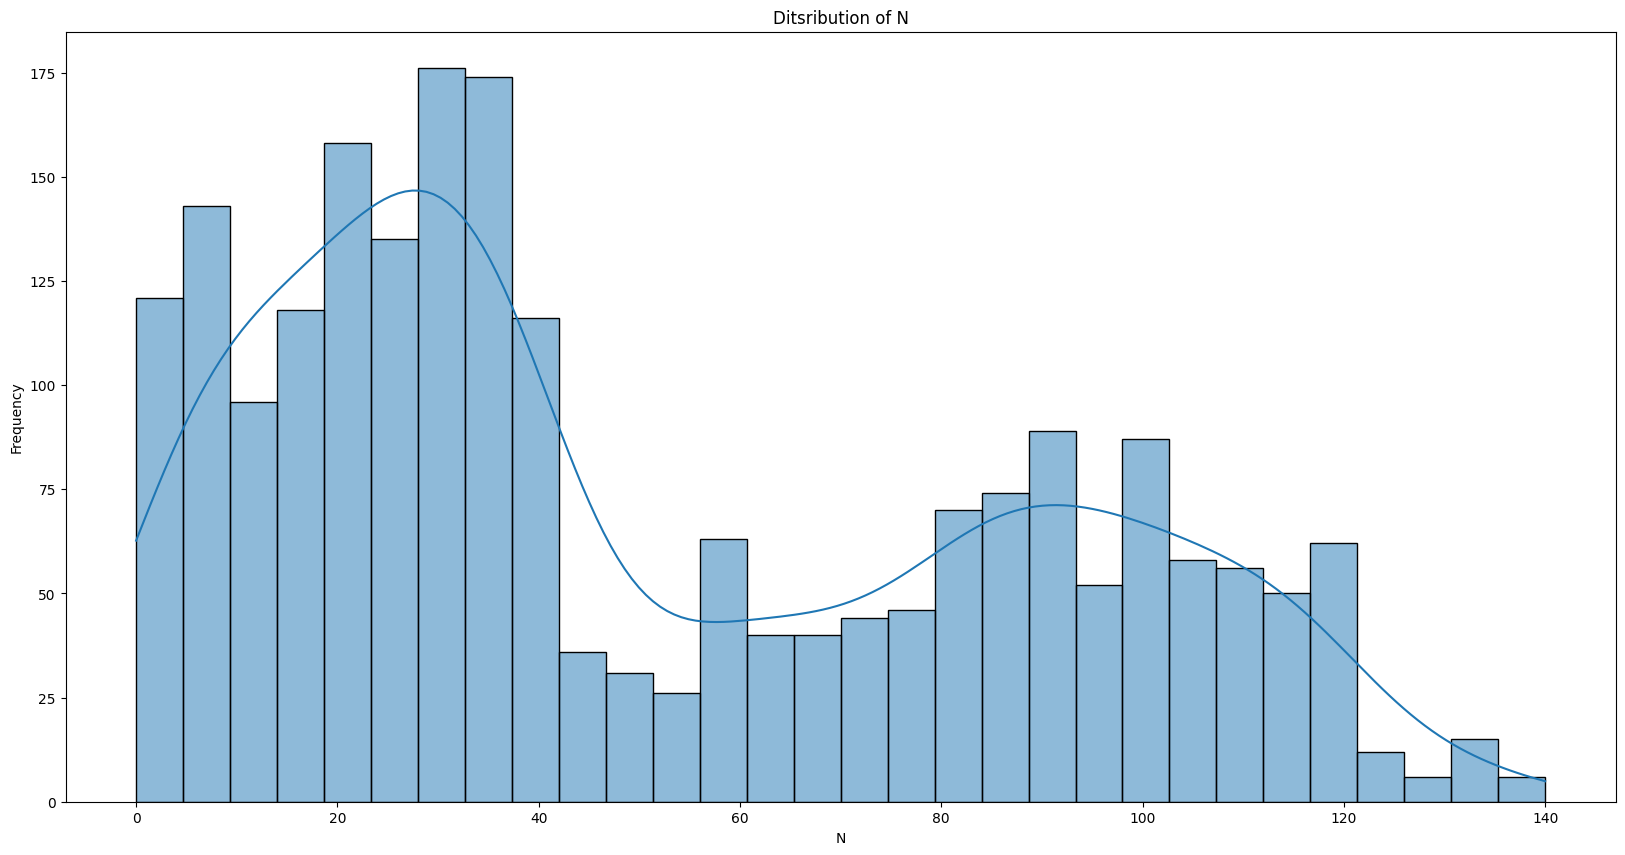

In [8]:
univariateAnalysis = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariateAnalysis.exceute_analysis(df,'N')
# univariateAnalysis.exceute_analysis(df,'chol')

In [9]:
#No categorical columns
# univariateAnalysis.set_strategy(CategoricalUnivariateAnalysis())
# univariateAnalysis.exceute_analysis(df,'')

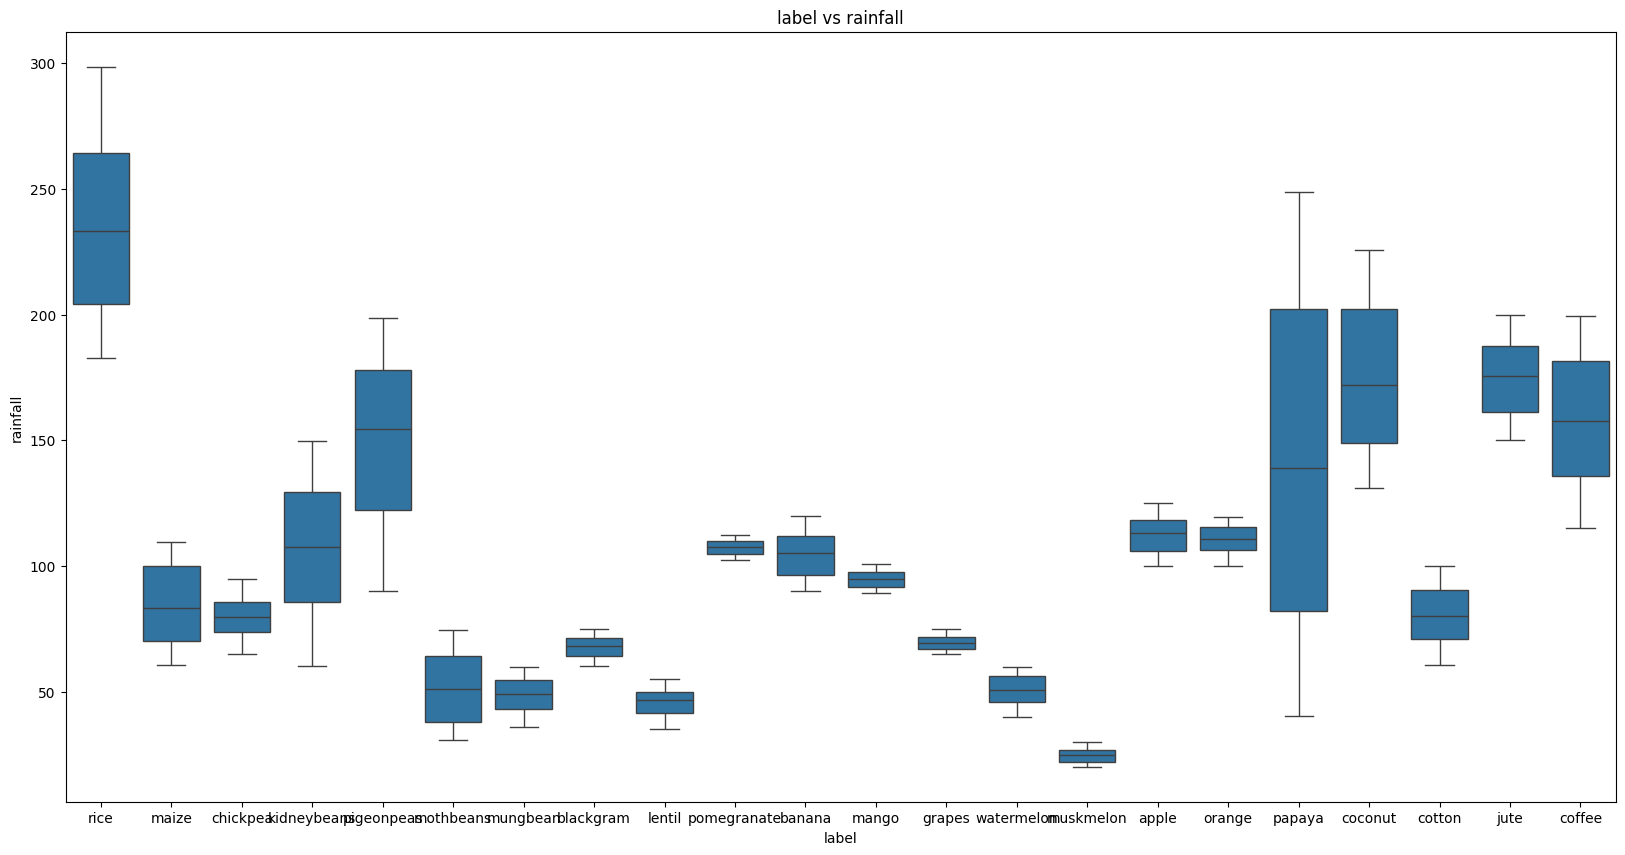

In [10]:
bivariateAnalysis = BivariateAnalyzer(CategoricalVsNumericalAnalysis())
bivariateAnalysis.execute_analysis(df,'label','rainfall')
# bivariateAnalysis.execute_analysis(df,'chol','target')


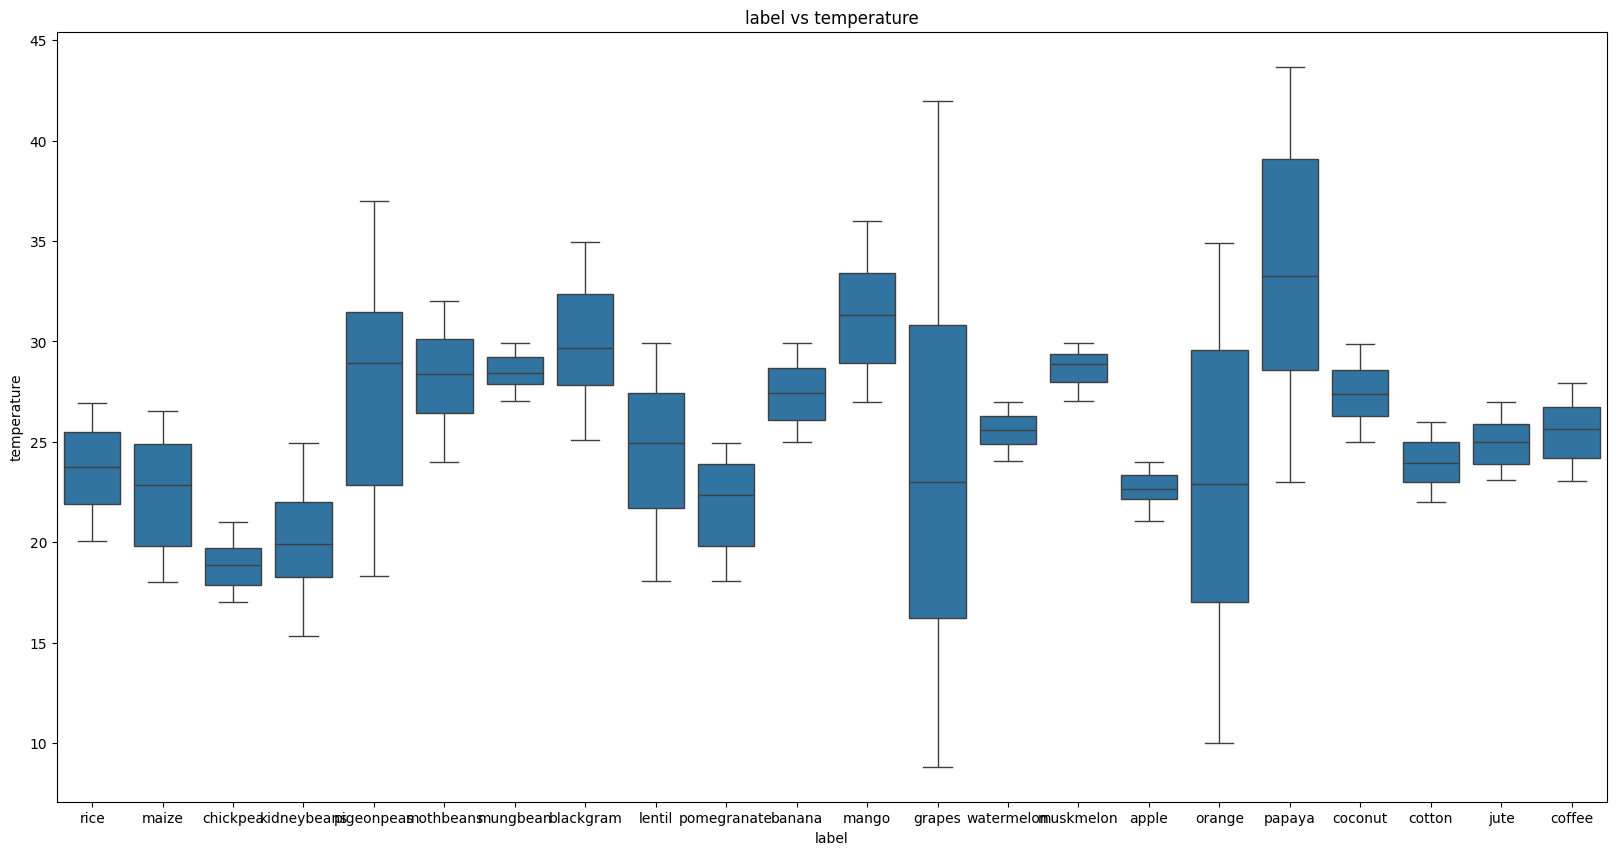

In [17]:
bivariateAnalysis.execute_analysis(df,'label','temperature')

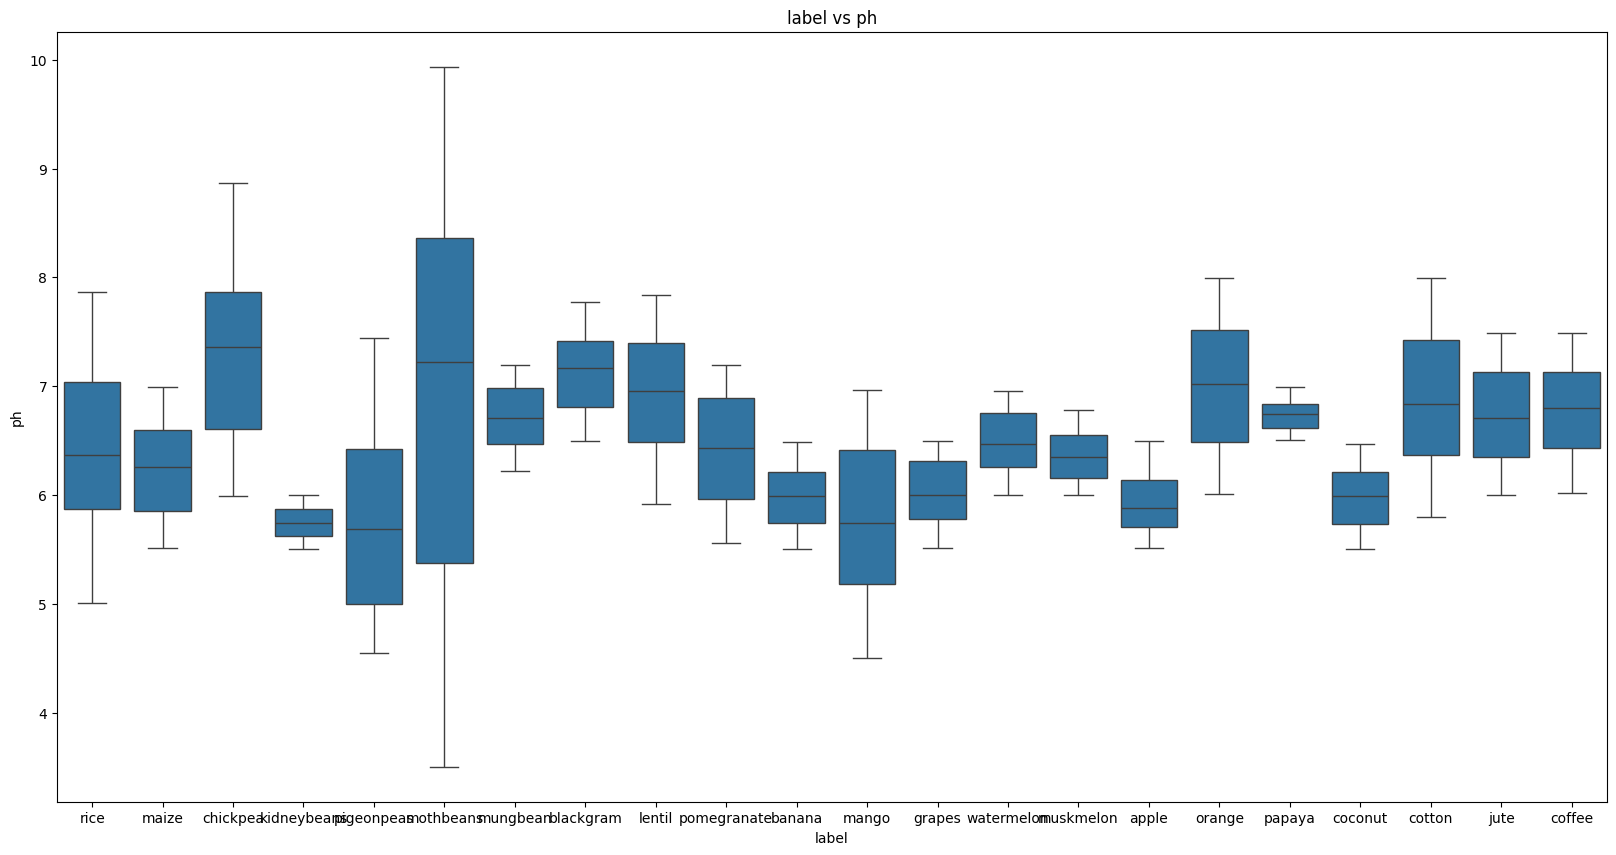

In [18]:
bivariateAnalysis.execute_analysis(df,'label','ph')

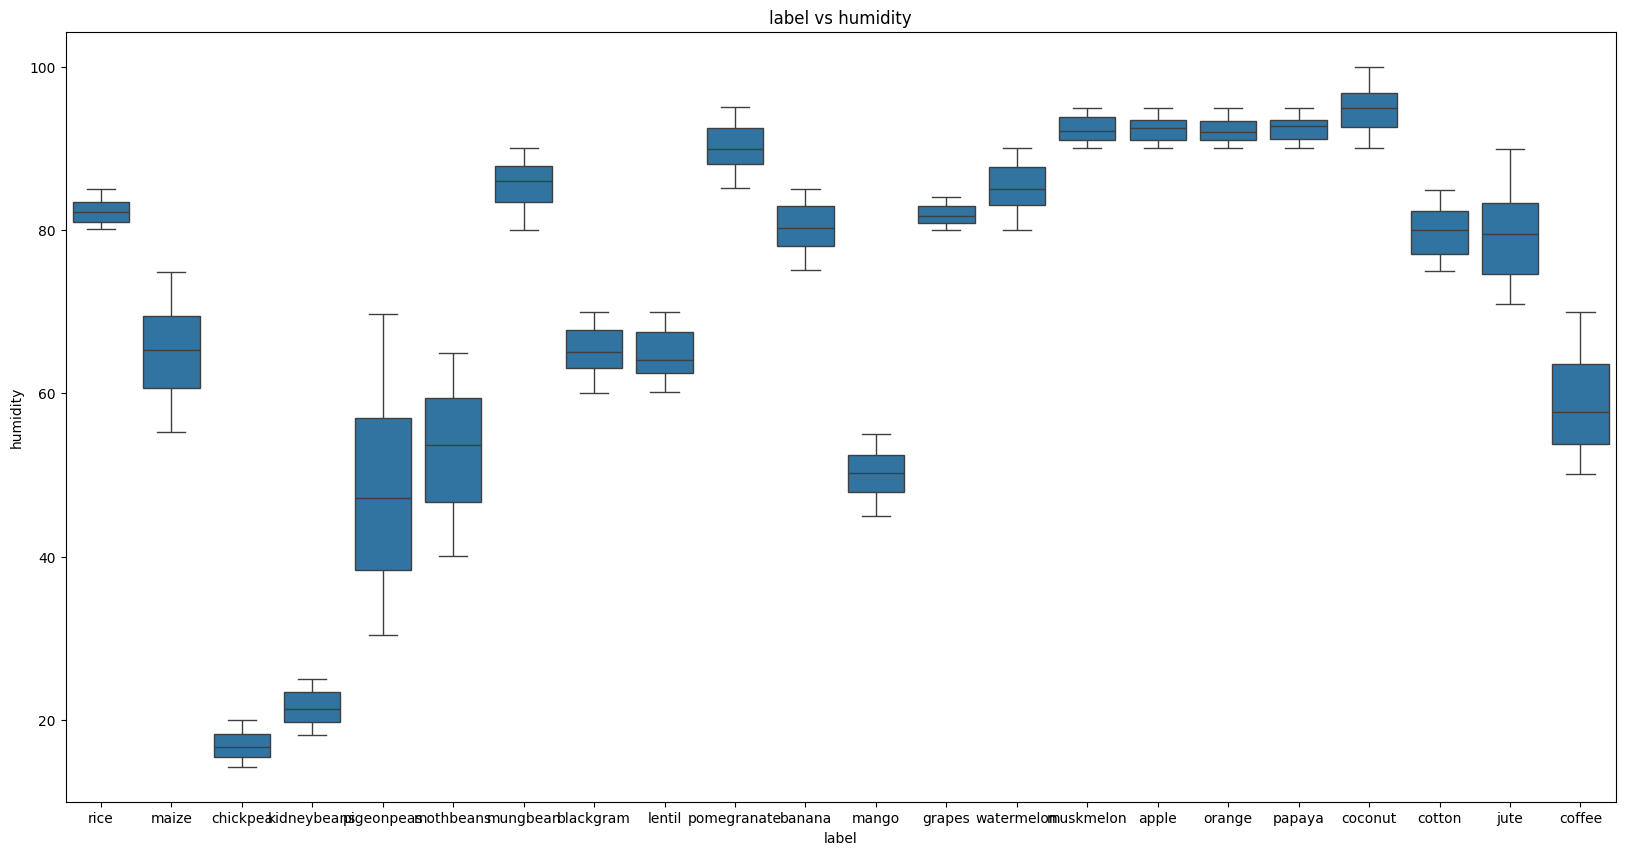

In [19]:
bivariateAnalysis.execute_analysis(df,'label','humidity')

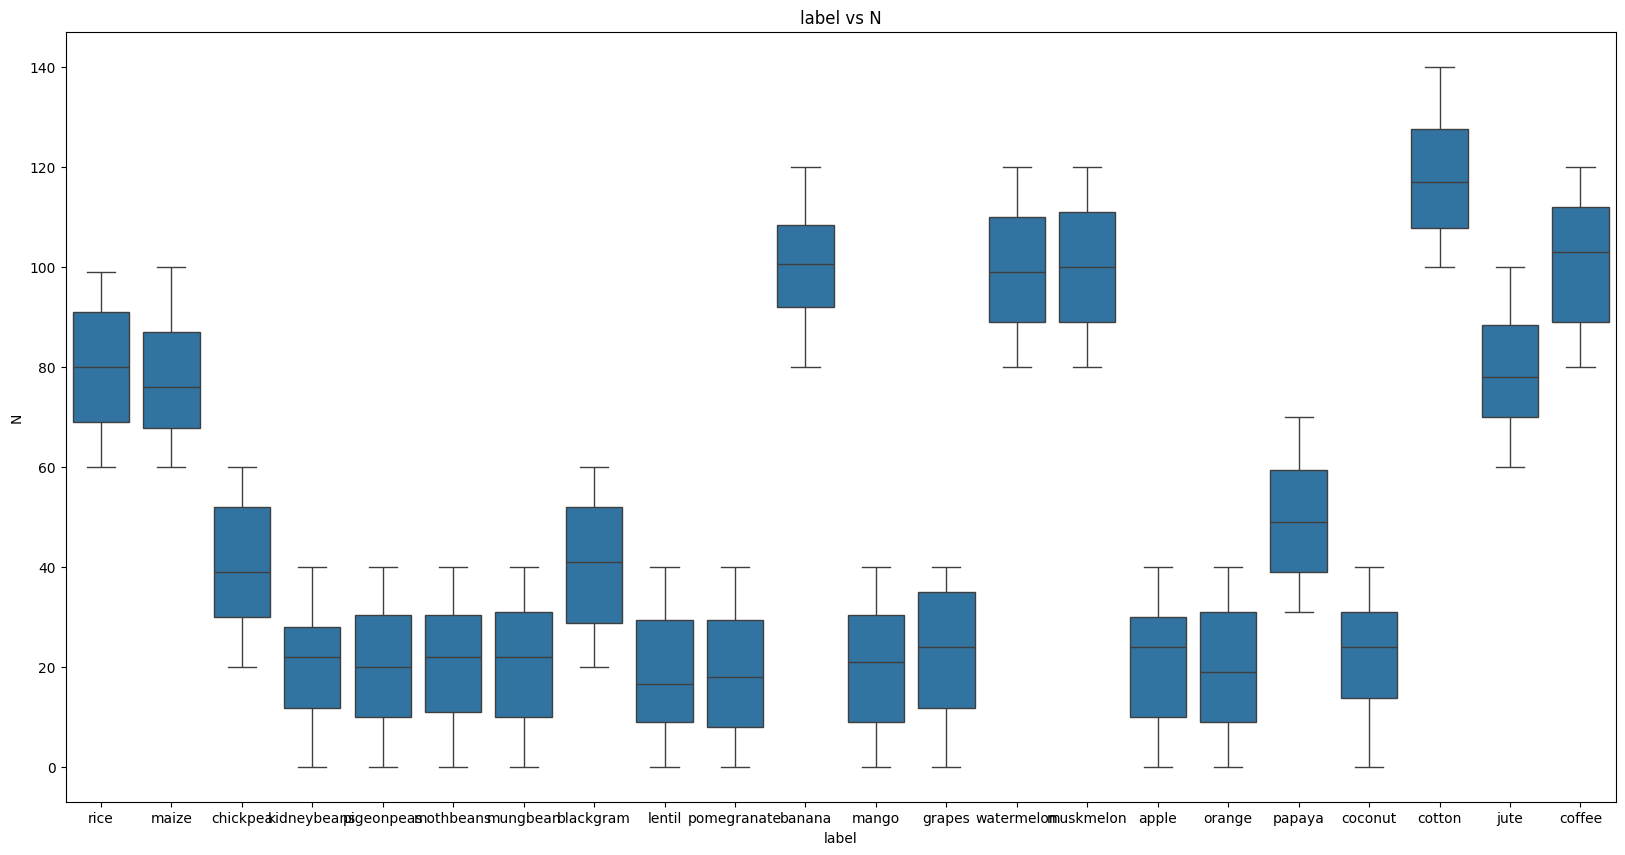

In [20]:
bivariateAnalysis.execute_analysis(df,'label','N')

In [15]:
# bivariateAnalysis.execute_analysis(df,'oldpeak','target')

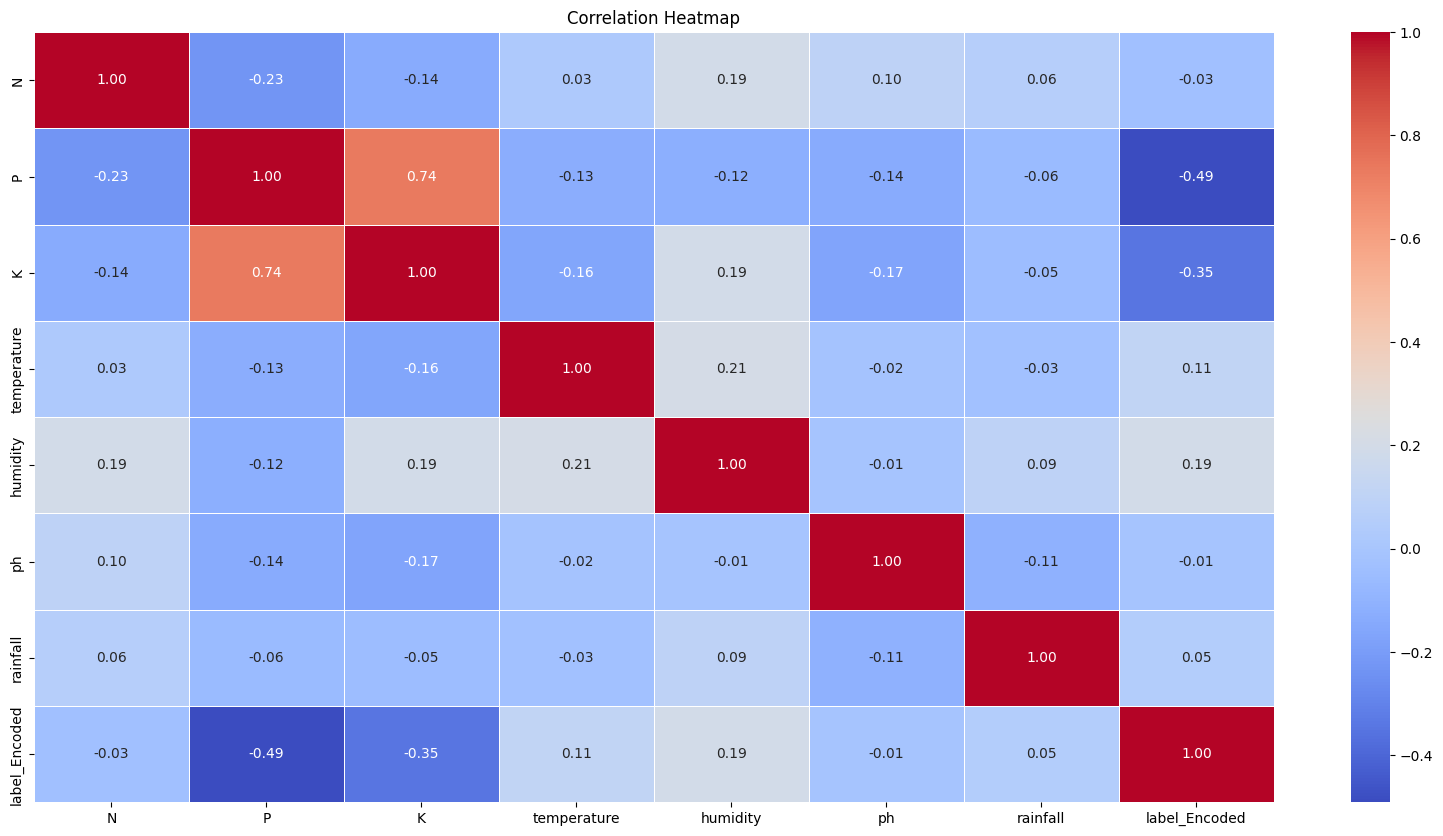

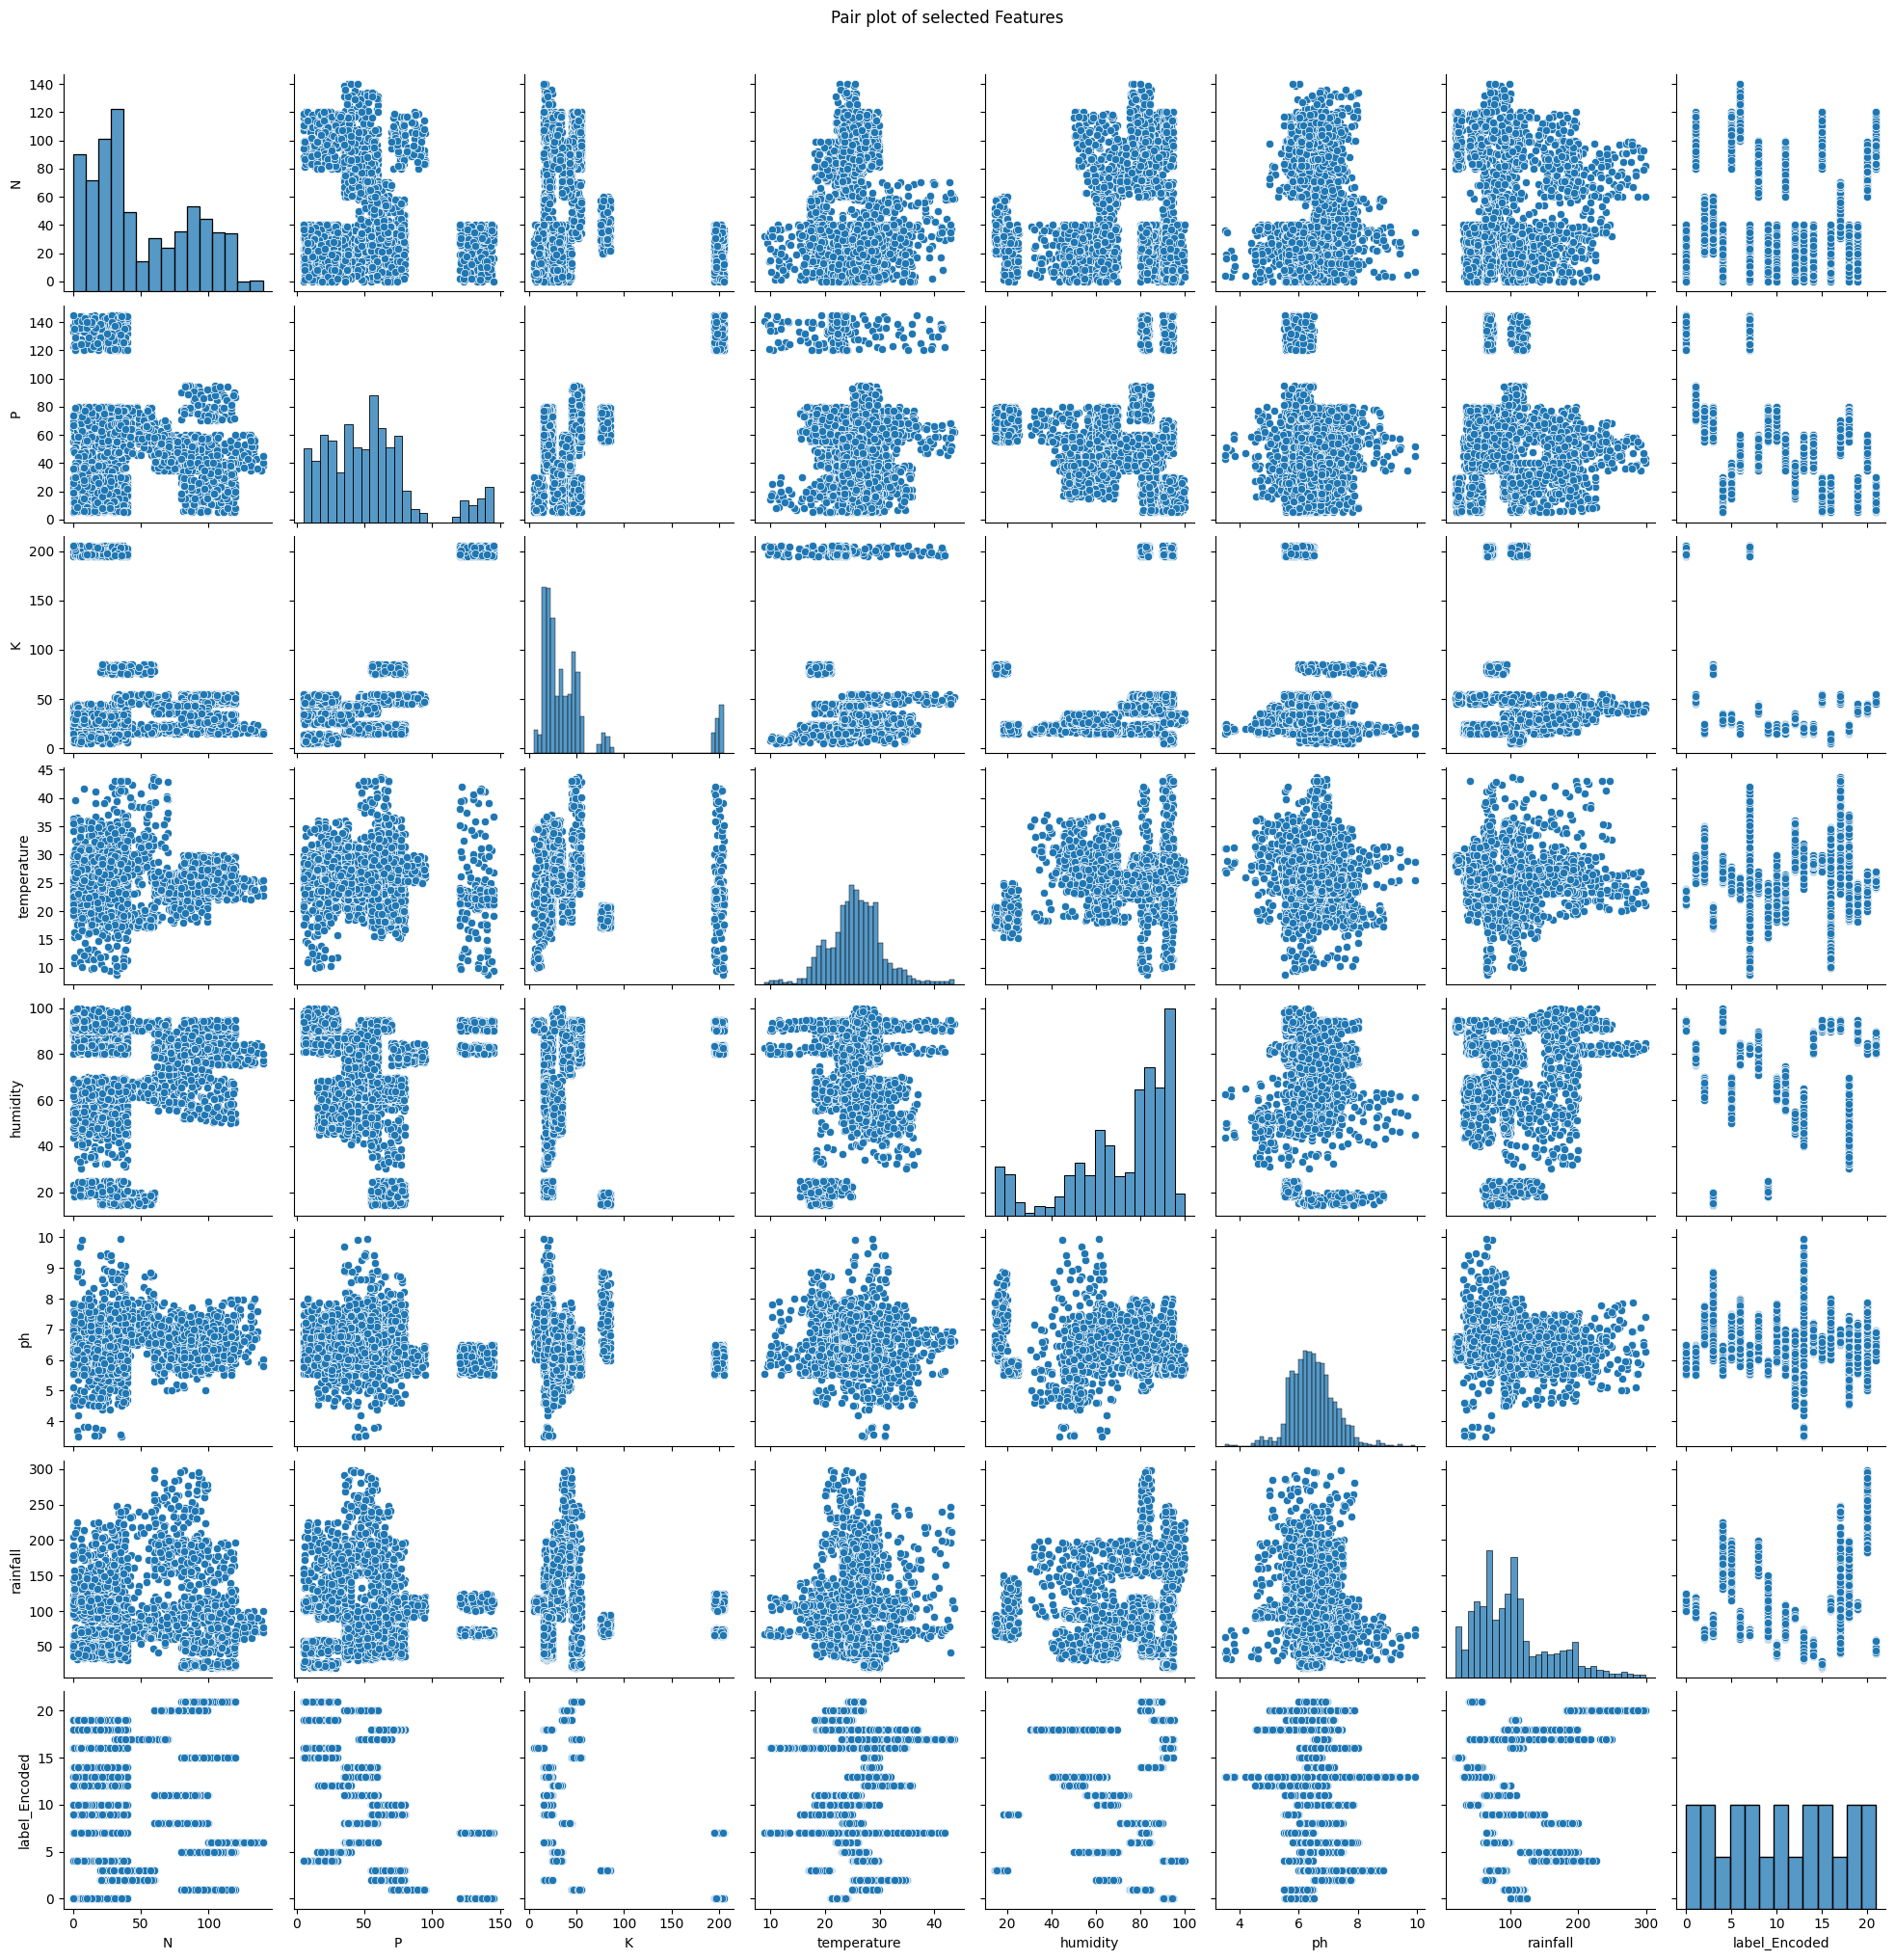

In [6]:
multivariateAnalysis = SimpleMultiVariateAnalysis()
multivariateAnalysis.analyze(df)